In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


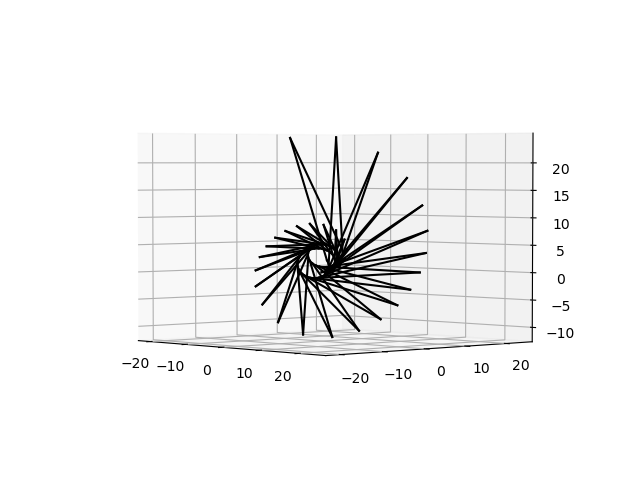

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')

#defines each vector and its position for the central spiral
def v(n, theta):
    l = np.sqrt(2)/2 # can be any number but sqrt(2)/2 gives integer side lengths
    v = np.array([l*np.cos(n*theta), l*np.cos(n*theta), l*np.sin(n*theta)])
    vmag = np.sqrt((v[0]**2) + (v[1]**2) + (v[2]**2))
    vhat = v/vmag
    return vhat #returns the direction of a the vector for a given n

#Cross product
def cross(v1,v2):
    return np.array([v1[1]*v2[2]-v1[2]*v2[1], (v1[2]*v2[0]-v2[2]*v1[0]), (v1[0]*v2[1]-v2[0]*v1[1])])

#main function   
def fractal(t, ang): #t is the number of squares and ang is their angle of deflection from one and other
#initial values for each variable
    l = np.sqrt(2)/2
    init = np.array([0,0,0])
    init_0 = init
    vec = init
    perp = np.array([1,-1,0])
    xx1 = 0
    yy1 = 0
    zz1 = 0
    xx2 = 0
    yy2 = 0
    zz2 = 0
    for i in range(t+1):
        
        #avoids 0/0
            i = i+1
        #this is tricky to explain better to see geometrically
            r = np.sqrt(2*(i**2))-(i-1)*(np.sqrt(2)/2)
        #gives the unit vector its magnitude
            vec = v(i, ang)*r
        #save the previous position step
            init_0 = init
        #the inital position of the vector
            init = init_0 + l*v(i,ang)
        #a vector normal to the direction of the unit vector at a given i
            norm = cross(v(i,ang),perp)
        #finding a basis at each i
            b2 = cross(v(i,ang),norm) 
            b2h = b2 * 1/(np.sqrt((b2[0]**2) + (b2[1]**2) + (b2[2]**2)))
            b1 = v(i,ang)
            b1h = b1 * 1/(np.sqrt((b1[0]**2) + (b1[1]**2) + (b1[2]**2)))
            b3 = norm
            b3h = b3 * 1/(np.sqrt((b3[0]**2) + (b3[1]**2) + (b3[2]**2)))
            
        #B basis as a matrix (not used)
            B = np.transpose(np.array([b1h,
                      b2h,
                      b3h]))
            
        #plot each diagonal spline         
            ax.plot([init[0]+b2h[0]*i,vec[0]+init[0]],[init[1]+b2h[1]*i,vec[1]+init[1]],[init[2]+b2h[2]*i,vec[2]+init[2]], color = 'black')
            ax.plot([init[0]-b2h[0]*i,vec[0]+init[0]],[init[1]-b2h[1]*i,vec[1]+init[1]],[init[2]-b2h[2]*i,vec[2]+init[2]], color = 'black')
        #connect the ends of each spline
            ax.plot([init[0]+b2h[0]*i,xx1],[init[1]+b2h[1]*i,yy1],[init[2]+b2h[2]*i,zz1], color = 'black')
            ax.plot([init[0]-b2h[0]*i,xx2],[init[1]-b2h[1]*i,yy2],[init[2]-b2h[2]*i,zz2], color = 'black')
        #saves the previous start point so connection is possible
            xx1 = init[0]+b2h[0]*i
            yy1 = init[1]+b2h[1]*i
            zz1 = init[2]+b2h[2]*i
        #same thing for the other side
            xx2 = init[0]-b2h[0]*i
            yy2 = init[1]-b2h[1]*i
            zz2 = init[2]-b2h[2]*i
            
        #the unit vectors
            #ax.plot([init[0],b1h[0]+init[0]],[init[1],b1h[1]+init[1]],[init[2],b1h[2]+init[2]],color = 'green')
            #ax.plot([init[0],b2h[0]+init[0]],[init[1],b2h[1]+init[1]],[init[2],b2h[2]+init[2]],color = 'red')
            #ax.plot([init[0],b3h[0]+init[0]],[init[1],b3h[1]+init[1]],[init[2],b3h[2]+init[2]], color = 'blue')
        #the vecotors describing each step
            #ax.plot([init[0],vec[0]+init[0]],[init[1],vec[1]+init[1]],[init[2],vec[2]+init[2]], color = 'black')
            
#call the function            
fractal(30, np.pi/12)
